dataset description: this dataset contains country level health, economic and social indicators collected from multiple years aling with corresponding life expectancy values. the data covers both developed and developing countries.

source: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

problem type: regression

target variable: life expectancy 

success criteria: model should have low mae which indicates accurate life expectancy estimation

In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [111]:
df=pd.read_csv("Life Expectancy Data.csv")
df.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \


In [112]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [113]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [114]:
df.dtypes


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [115]:
df.shape

(2938, 22)

In [116]:
df.isna().sum().sort_values(ascending=False)


Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness  1-19 years               34
 thinness 5-9 years                 34
 BMI                                34
Diphtheria                          19
Polio                               19
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Status                               0
Country                              0
Year                                 0
under-five deaths                    0
Measles                              0
percentage expenditure               0
 HIV/AIDS                            0
dtype: int64

In [117]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


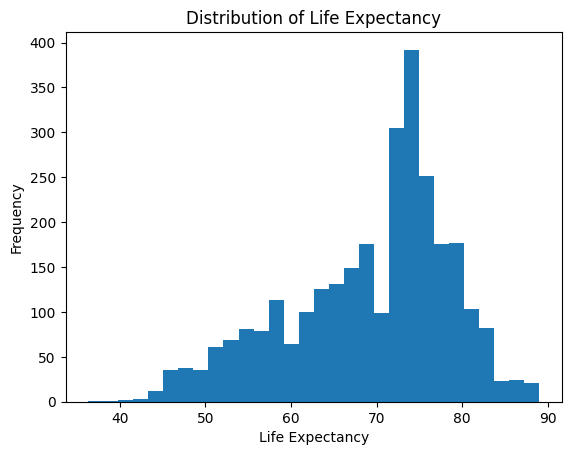

In [118]:
plt.hist(df['Life expectancy '], bins=30)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.show()

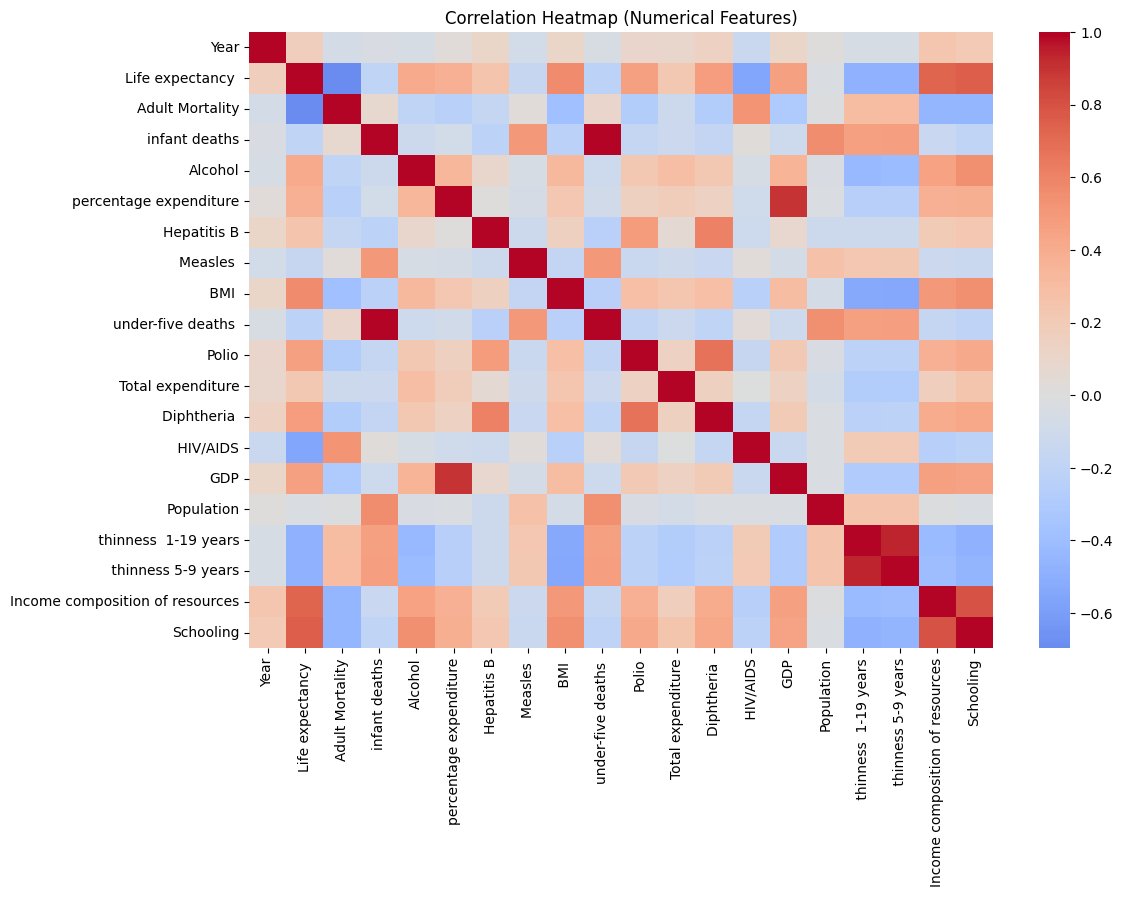

In [119]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap='coolwarm',
            center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()



In [ ]:
df.columns

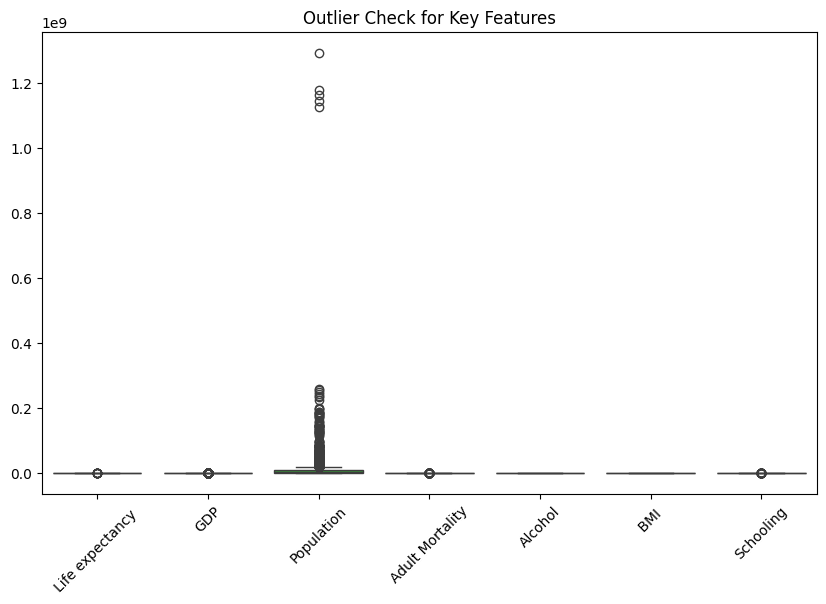

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Life expectancy ',
                     'GDP',
                     'Population',
                     'Adult Mortality',
                     'Alcohol',' BMI ', 'Schooling']])
plt.xticks(rotation=45)
plt.title("Outlier Check for Key Features")
plt.show()


since gdp is in very large values all other features seem like they are concentrated to 0 because of the difference in their scale this makes it hard to visualise the outliers and hence requires scaling

very strong negative correlation with hiv/aids and adult mortality while very strog positive correlation with schooling

histogram shows highest frequency of life expectancy to be between 70 and 80

In [121]:
df.columns=df.columns.str.strip()
y=df['Life expectancy']
X=df.drop(columns=['Life expectancy'])


In [122]:
mask = y.notna()
X = X[mask]
y = y[mask]


In [123]:
X.isna().sum().sort_values(ascending=False)

Population                         644
Hepatitis B                        553
GDP                                443
Total expenditure                  226
Alcohol                            193
Schooling                          160
Income composition of resources    160
thinness 5-9 years                  32
BMI                                 32
thinness  1-19 years                32
Diphtheria                          19
Polio                               19
Country                              0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
under-five deaths                    0
Measles                              0
percentage expenditure               0
HIV/AIDS                             0
dtype: int64

In [124]:
num_cols=X.select_dtypes(include='number').columns
cat_cols=X.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
        'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
        'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
        'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
        'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
       dtype='object'),
 Index(['Country', 'Status'], dtype='object'))

In [125]:
for col in num_cols:
    median= X[col].median()
    X[col] = X[col].fillna(median)


In [126]:
X.isna().sum().sort_values(ascending=False)

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [127]:
X = X.drop(columns=['Country'])

In [128]:
X['Status'] = X['Status'].map({'Developed': 1, 'Developing': 0})

In [129]:
def train_test_split(X,y,test_size=0.2, seed=42):
    np.random.seed(seed)
    index=np.arange(len(X))
    np.random.shuffle(index)
     
    split_rows= int(len(X)*(1-test_size))

    train_rows=index[:split_rows]
    test_rows=index[split_rows:]

    X_train = X.iloc[train_rows]
    X_test = X.iloc[test_rows]
    y_train = y.iloc[train_rows]
    y_test = y.iloc[test_rows]

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, seed=42)

In [130]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for col in X_train.columns:
    mean = X_train[col].mean()
    std = X_train[col].std()
    
    X_train_scaled[col] = (X_train[col] - mean) / std
    X_test_scaled[col] = (X_test[col] - mean) / std


In [ ]:
X_train_scaled.describe()


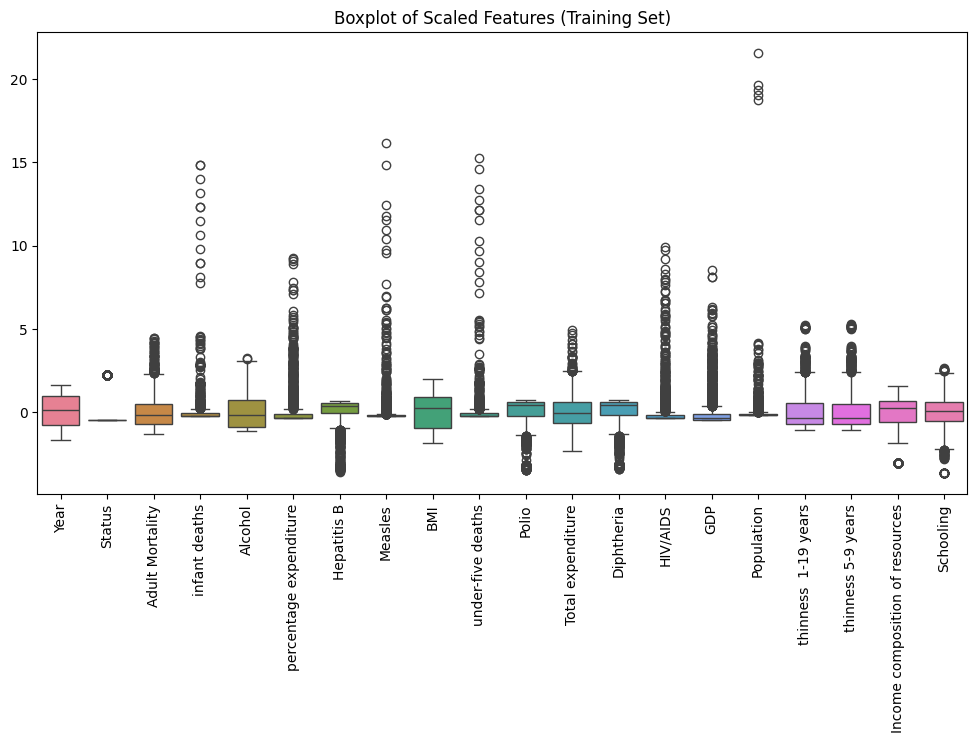

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features (Training Set)")
plt.show()

median imputation for numerical values because of the high number of rows having null values

dropped country feature and binary encoded status feature


In [132]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    def fit(self, X, y):
        n_samples, n_features = X.shape
    
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = self.predict(X)

            error = y_pred - y

            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db



In [133]:
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train_scaled.values, y_train.values)


In [134]:
y_pred = model.predict(X_test_scaled.values)

In [135]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [136]:
mae = mean_absolute_error(y_test.values, y_pred)
print("MAE:", mae)

MAE: 3.243699553731671


In [137]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

sk_pred = sk_model.predict(X_test_scaled)

sk_mae = mean_absolute_error(y_test.values, sk_pred)
print("Sklearn MAE:", sk_mae)


Sklearn MAE: 3.1515346752701157


it shows that developed country generally have a higher life expectancy than developing countries 

if learning rate increases mae also increases 

in countries with low gdp the predicted values are often different from actual ones due to unpredictability and poverty leading to sudden deaths 

part 4 : unsupervised(k-means)
taking k=3 because countries can be divided into 3 categories based on mortality rate, schooling and health

In [138]:
cluster_features = [
    'Adult Mortality',
    'HIV/AIDS',
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Alcohol'
]

X_cluster = X_train_scaled[cluster_features].values

In [139]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4, seed=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.seed = seed
        self.centroids = None
        self.labels = None
    def fit(self, X):
        np.random.seed(self.seed)

        random_idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):

            clusters = [[] for _ in range(self.n_clusters)]

            for idx, point in enumerate(X):
                distances = [
                    euclidean_distance(point, centroid)
                    for centroid in self.centroids
                ]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(idx)

            new_centroids = []
            for cluster in clusters:
                if cluster:
                    cluster_mean = np.mean(X[cluster], axis=0)
                    new_centroids.append(cluster_mean)
                else:
                    new_centroids.append(self.centroids[len(new_centroids)])

            new_centroids = np.array(new_centroids)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels = np.zeros(len(X))
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                self.labels[sample_idx] = cluster_idx

    def predict(self, X):
        labels = []

        for point in X:
            distances = [
                euclidean_distance(point, centroid)
            for centroid in self.centroids
            ]
            label = np.argmin(distances)
            labels.append(label)

        return np.array(labels)



In [140]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)

cluster_labels = kmeans.predict(X_cluster)


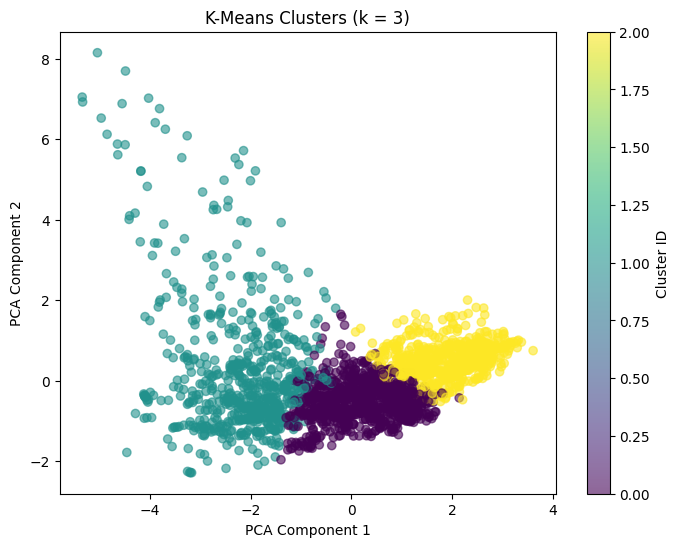

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters (k = 3)")
plt.colorbar(label="Cluster ID")
plt.show()


Structure: The PCA visualization of K-Means clusters shows three distinct groupings, with one compact cluster, one moderately spread cluster, and one highly dispersed cluster, indicating varying levels and variability of health and socio-economic development

The observed cluster structure explains why a single global linear regression model may not perform equally well across all samples. Countries in the dispersed cluster exhibit heterogeneous relationships between predictors and life expectancy, suggesting that cluster-specific models or cluster membership as an additional feature could improve supervised performance.

FAILURE:

Countries belonging to the highly dispersed cluster show larger prediction errors, as their health and socio-economic indicators vary widely and violate the linear model’s assumption of uniform relationships.

Countries near the boundary between the central (purple) and dispersed (teal) clusters are difficult for the linear regression model to predict accurately, as their characteristics lie between development regimes

3 QUESTIONS:

1) what does pca do if clustering was already done
    PCA is used only for visualization, allowing high-dimensional cluster structure to be interpreted in two dimensions without influencing the clustering process itself.
2) Why is one cluster more spread out than others?
    The dispersed cluster represents countries with heterogeneous health and socio-economic conditions, leading to higher variance in the principal components.
3) Why does this affect linear regression performance?
    Linear regression assumes a single global relationship, which is violated when different clusters follow different underlying patterns, especially in heterogeneous groups.